# Heat Map of Covid-19 Cases in United States

Coronaviruses are a large family of viruses that may cause illnesses in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization.

The data used in this analysis is obtained from COVID-19 Tracking project and NYTimes and can be found [here](https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-usa). This dataset has information from 50 US states and the District of Columbia at daily level.


## Description of the data set

This dataset has number of tests conducted in each state at daily level. Column descriptions are:

- **date** - date of observation
- **state** - US state 2 digit code
- **positive** - number of tests with positive results
- **negative** - number of tests with negative results
- **pending** - number of test with pending results
- **death** - number of deaths
- **total** - total number of tests

## Implentation

**Loading required libraries**

In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
from geopy.geocoders import Nominatim
from IPython.display import Image

**Importing the data set**

In [2]:
covid = pd.read_csv('us_counties_covid19_daily.csv')
covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In this data analysis, i focus on cases per state so I group the cases per state as shown below.

In [3]:
#grouping by state
covid_by_state = covid.groupby(by='state', as_index=False)

#droping other columns except `state` and `cases`
covid_by_state = covid_by_state[['state', 'cases']].sum()
covid_by_state = covid_by_state.sort_values('cases', ascending=False)
covid_by_state = covid_by_state.drop_duplicates('state')

C:\Users\lutaa\AppData\Local\Temp\ipykernel_6452\123764438.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_by_state = covid_by_state[['state', 'cases']].sum()


Therefore, a snapshot of  the total number of cases by state is shown below

In [4]:
covid_by_state.head()

,state,cases
4,California,127488272
46,Texas,119483867
9,Florida,107316623
33,New York,104506668
14,Illinois,59101931


-*Based on the results above, Carlifornia has the highest cases followed by texas and so on.*

**Obtaining latitude and longitude for each state**

To create a heat map showing total cases per state I need the the latitude and longitude for each staes. In the steps below I utilize the `geopy` library these coordinates for each state.

First, I write a utility function called `coordinates` that expects input as location name an then outputs the corresponding latitude and longitude

In [5]:
geo_loc = Nominatim(user_agent='bytescout', timeout=None)

In [6]:
def coordinates(location):
    place = geo_loc.geocode(query = location)
    return (place.latitude, place.longitude)

Testing the function on **Ohio** state

In [7]:
coordinates('Ohio')

(40.2253569, -82.6881395)

Next, I obtain the latitude and longitude coordinates for all states

In [8]:
latitude = []
longitude = []
for state in covid_by_state.state:
    coord = coordinates(state)
    latitude.append(coord[0])
    longitude.append(coord[1])

In [9]:
covid_by_state['latitude'] = latitude
covid_by_state['longitude'] = longitude

Modified data with latitude and longitude coordinates

In [10]:
covid_by_state.head()

,state,cases,latitude,longitude
4,California,127488272,36.701463,-118.755997
46,Texas,119483867,31.263890,-98.545612
9,Florida,107316623,27.756767,-81.463983
33,New York,104506668,40.712728,-74.006015
14,Illinois,59101931,40.079661,-89.433729


**Creating the heat map**

The heat map is created using the latitude and longitude coordinates as well covid-19 cases as weights. So I first create a 2-dimensional list consisting latitude and longitude coordinates as well covid-19 cases as weights for each state.

In [11]:
two_list = [[float(covid_by_state.latitude[index]), float(covid_by_state.longitude[index]), int(covid_by_state.cases[index])] for index in range(covid_by_state.shape[0])]

In [12]:
two_list[:3]

[[33.2588817, -86.8295337, 24024159],
 [64.4459613, -149.680909, 1747498],
 [34.395342, -111.763275, 35564144]]

Finally I create the heat map using the above 2D list

In [13]:
#initializing the U.S map
us_map = folium.Map(location= [33.2588817, -86.8295337], zoom_start= 3.8)

#Creating the Heatmap
HeatMap(two_list).add_to(us_map)
us_map.save('2.Heat_Map_US_Covid19_cases.html')

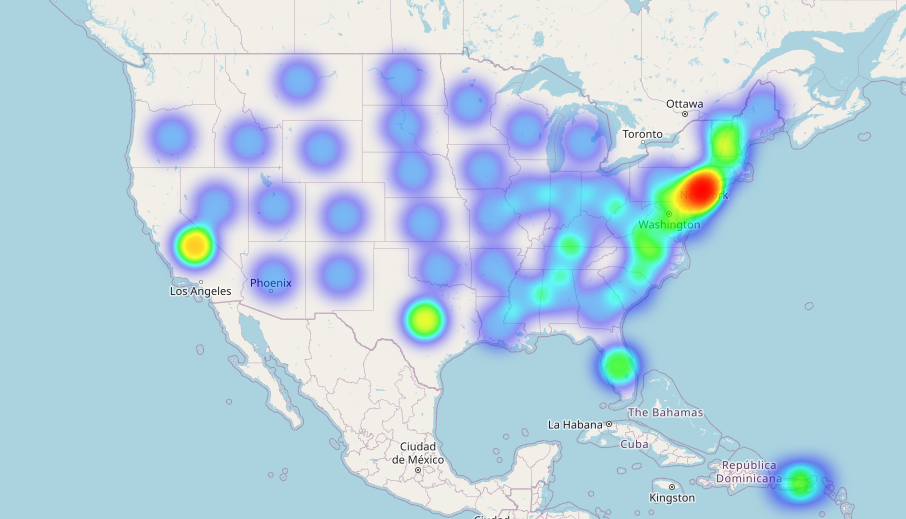

In [14]:
Image('heat_map.png')

## Conclusion

- *Based on the above heat map, the most affected states were New york, Carlifornia, and Texas.*